In [272]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math

In [273]:
x=np.array([1,2,3])
sigmoid(x)
B=1
sigmoidB(B,x)

[ 0.73105858  0.88079708  0.95257413]


array([ 0.73105858,  0.88079708,  0.95257413])

In [274]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    grad=np.multiply(np.multiply(eta,np.add(Id,(1-2*Z)*Y.T)),W)

In [275]:
sourceFilesPrefix="ExpectedResults\\music-"
resultFilesPrefix="AudioResults\\fromExpected-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
#plt.figure(1)
#plt.plot(sample1_data)
#plt.title("data1")
#plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
#plt.figure(2)
#plt.plot(sample2_data)
#plt.title("data2")
#plt.show()

5564.16372545
2619.18445716


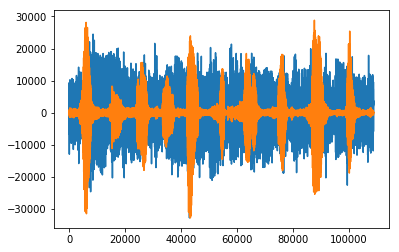

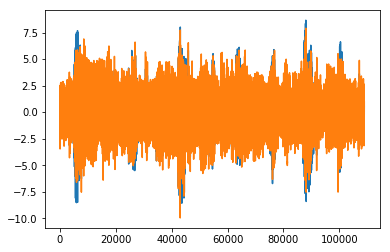

In [276]:
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]

plt.figure(1)
plt.plot(S2)
plt.show()
#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

mixingMatrix1=np.array([1.1,0.7])
mixingMatrix2=np.array([1.5,0.5])
m=np.matrix([mixingMatrix1,mixingMatrix2])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
plt.figure(2)
plt.plot(X1)
plt.plot(X2)
plt.show()
X=np.c_[X1,X2]
X=X.T

In [277]:
eta=0.01
eta0=eta
T=1000
num_iter=10
W=np.random.random(m.shape)/20
#print("W "+str(W))
numSrc=X.shape[0]
print(numSrc)
b=np.ones((numSrc,1),float)
#print(W)
#print(b)
kappa=0.01

2


In [278]:
def sigmoidB(B,y):
    #g=np.zeros(y.shape)
    #print("B"+str(B))
    #print("Y"+str(y))
    #print(-np.multiply(B,y))
    #print(np.exp(-np.multiply(B,y)))
    g=np.divide(1,np.add(1,np.exp(-(np.multiply(B,y)))))
    #print(g)
    return g

In [279]:
def wgradientbeta(eta,kappa,b, Y, W):
    delW=np.zeros(W.shape)
    B=np.kron(np.ones((1,Y.shape[1]),float),b)
    #print("B"+str(B))
    Z=sigmoidB(B,Y)
    print("Z"+str(Z))
    Id=np.identity(Y.shape[0])
    a=(B*(1-2*Z))
    #print(a)
    l=np.dot(a,Y.conjugate().T)
    #print(l)
    grad=eta*(Id+l)*W
    #print("grad"+str(grad))
    #delmyW=eta*((np.multiply(B,(1-2*Z))*Y.T)+np.linalg.pinv(W).T)
    #delb=kappa*(np.sum((np.multiply(Y,(1-2*Z))*Y.T).T)).T
    return (grad, 0,0)

In [280]:
for i in range(0,num_iter):
    Y=np.dot(W,X)
    (delW,delmyW,delb)=wgradientbeta(eta,kappa,b,Y,W)
    print("W "+str(W))
    W=W+delW
    print("delW "+str(delW))
    eta=eta0/(1+(i/T))
    #print("eta "+str(eta))
    if i%100==0:
        b+=delb

Z[[ 0.49492995  0.49641678  0.49681519 ...,  0.50673465  0.50769116
   0.50565971]
 [ 0.49683015  0.49770225  0.49798117 ...,  0.50407762  0.50466458
   0.5034465 ]]
W [[ 0.01133045  0.02154699]
 [ 0.00170803  0.0169988 ]]
delW [[-0.01440807 -0.01650032]
 [-0.00130857 -0.00763535]]
Z[[ 0.49947044  0.49958016  0.49964542 ...,  0.500598    0.50068911
   0.50051821]
 [ 0.49831609  0.49877394  0.49892493 ...,  0.50215359  0.50246437
   0.50182219]]
W [[-0.00307761  0.00504667]
 [ 0.00039945  0.00936345]]
delW [[ -1.20148291e-06  -1.71593382e-04]
 [ -1.35811739e-05  -1.10143814e-03]]
Z[[ 0.49950059  0.49960218  0.49966471 ...,  0.50055958  0.50064514
   0.50048568]
 [ 0.49851033  0.49891572  0.49904911 ...,  0.50190597  0.50218097
   0.50161255]]
W [[-0.00307881  0.00487508]
 [ 0.00038587  0.00826201]]
delW [[ -4.80944782e-06  -1.36740469e-04]
 [ -1.08228231e-05  -7.42805429e-04]]
Z[[ 0.49952507  0.49962001  0.49968033 ...,  0.50052831  0.50060935
   0.50045921]
 [ 0.49864152  0.49901146  0

In [281]:
print(W)

[[-0.00317378  0.00418068]
 [ 0.00033091  0.00525756]]
